In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbrn
import numpy as np
import re
import datetime

%matplotlib inline

In [50]:
dat = pd.read_csv('../data/water_pump/training.csv', header=0)

In [75]:
dat.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
26636,47759,0.0,2011-03-27,Village Council,0,Village Council,33.310761,-9.006723e+00,Damson Ndisa,0,...,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
7861,30172,5000.0,2013-01-30,Rudep,1132,Distri,32.130957,-6.799369e+00,Kwa Mtemi,0,...,annually,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
31925,61255,0.0,2013-01-18,Dwsp,0,DWE,0.000000,-2.000000e-08,Neema Ya Mungu,0,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8175,40073,200.0,2013-03-22,Kkkt Church,648,KKKT CHURCH,37.911771,-4.501720e+00,Kwa Hawa,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
34228,13304,0.0,2013-01-28,Dasip,0,Victoria,32.423657,-3.833167e+00,Ishololo,0,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump


In [51]:
dat.shape

(59400, 40)

In [68]:
dat.describe(percentiles=[0.25,.5,.6,.70,.75,.8,.9,.95])

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
60%,44550.800000,0.000000,930.000000,35.851175,-4.357631e+00,0.000000,14.000000,4.000000,90.000000,1996.000000
70%,51964.600000,0.000000,1229.000000,36.845036,-3.503652e+00,0.000000,17.000000,4.000000,160.000000,2002.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
80%,59435.200000,50.000000,1415.000000,37.578860,-3.209251e+00,0.000000,18.000000,6.000000,260.000000,2007.000000


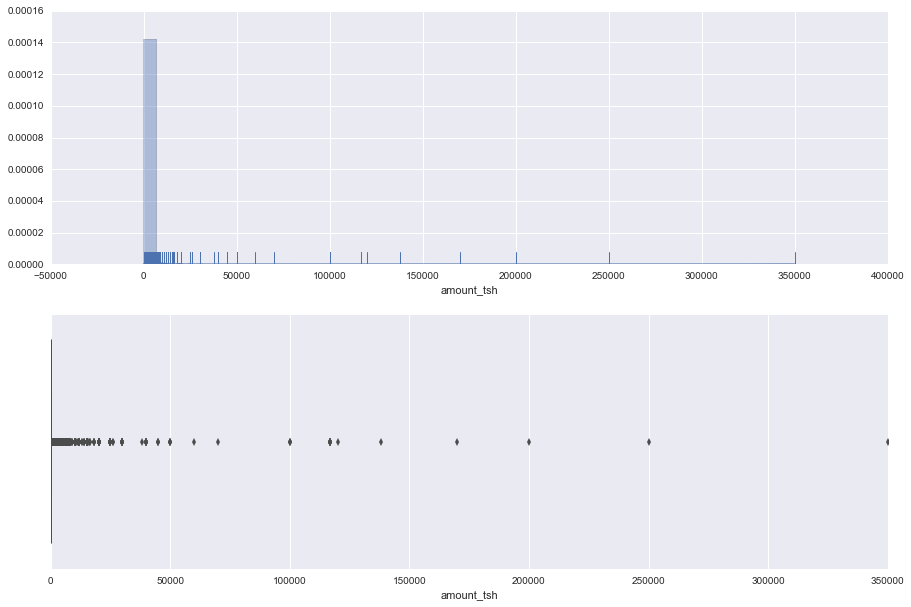

In [61]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
sbrn.distplot(dat.amount_tsh, ax=ax1, kde=True, rug=True)
sbrn.boxplot(dat.amount_tsh, ax=ax2)

In [74]:
dat['date_recorded']=pd.to_datetime(dat.date_recorded)

In [94]:
#not a time series, readings are sporadic, there are gaps in years
dat.date_recorded.sort_values(ascending=True).head(35)

2601    2002-10-14
27501   2004-01-07
42343   2004-03-01
23373   2004-03-01
33942   2004-03-01
32619   2004-03-01
39559   2004-03-06
52271   2004-04-01
8736    2004-04-05
8729    2004-05-01
58663   2004-05-01
13366   2004-06-01
28490   2004-07-01
3446    2004-08-01
762     2004-08-01
55669   2004-09-01
47000   2004-09-01
48555   2004-12-01
57291   2004-12-01
10441   2004-12-01
16468   2004-12-01
15103   2004-12-01
22754   2004-12-01
18730   2004-12-01
14697   2004-12-01
30319   2004-12-01
48150   2004-12-01
1189    2004-12-01
32775   2004-12-01
50564   2004-12-01
26086   2004-12-01
1015    2011-01-03
8352    2011-01-03
8245    2011-01-03
11563   2011-01-03
Name: date_recorded, dtype: datetime64[ns]

In [101]:
dat['year']=dat.date_recorded.dt.year

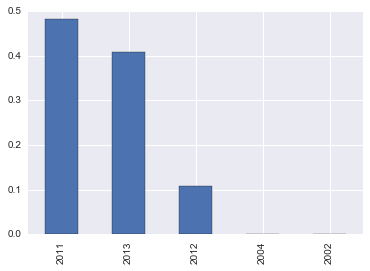

In [130]:
#2004 and 2002 datapoints; <1% of the dataset combined

dat.year.value_counts(normalize=True).plot(kind='bar')

In [133]:
#funder
dat['funder']=dat['funder'].astype('category',copy=False)

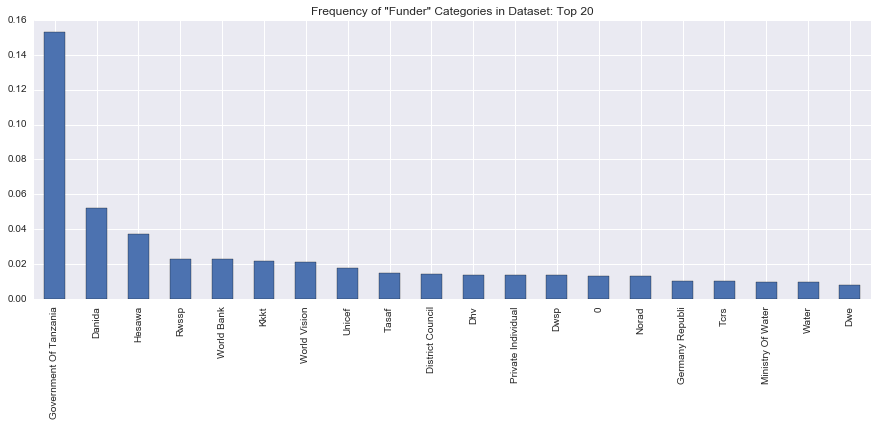

In [155]:
dat.funder.value_counts(normalize=True).head(20).plot(kind='bar', figsize=(15,5))
plt.title('Frequency of "Funder" Categories in Dataset: Top 20')
#Top 20-ish funders get close to making up about 50% of the dataset

In [157]:
dat.funder.sample(5)

29968                 District Council
16066    Halmashauri Ya Wilaya Sikonge
12675                          African
30165                             Kkkt
45928                           Hesawa
Name: funder, dtype: category
Categories (1897, object): [0, A/co Germany, Aar, Abas Ka, ..., Zao Water Spring, Zao Water Spring X, Zinduka, Zingibali Secondary]

In [158]:
dat.gps_height.sample(5)

43204     852
12918    1594
52546    1625
18144       0
38851     337
Name: gps_height, dtype: int64